# ДЗ

1) Попытаться ответить на вопросы/выдвинуть гипотезы

Начиная с этого вебинара, мы будем строить *базовое решение* для системы рекомендаций топ-N товаров. В финальном проекте вам нужно будет его существенно улучшить.  
  
**Ситуация**: Вы работает data scientist в крупном продуктовом российском ритейлере. Ваш конкурент сделал рекомендательную систему, и его продажи выросли. Ваш менеджмент тоже хочет увеличить продажи   
**Задача со слов менеджера**: Сделайте рекомендательную систему топ-10 товаров для рассылки по e-mail

**Ожидание:**
- Отправляем e-mail с топ-10 товарами, отсортированными по вероятности

**Реальность:**
- Чего хочет менеджер от рекомендательной системы? (рост показателя X на Y% за Z недель)
- По-хорошему надо бы предварительно посчитать потенциальный эффект от рекоммендательной системы (Оценки эффектов у менеджера и у вас могут сильно не совпадать: как правило, вы знаете про данные больше)
- А у нас вообще есть e-mail-ы пользователей? Для скольки %? Не устарели ли они?
- Будем ли использовать СМС и push-уведомления в приложении? Может, будем печатать рекомендации на чеке после оплаты на кассе?
- Как будет выглядеть e-mail? (решаем задачу топ-10 рекомендаций или ранжирования? И топ-10 ли?)
- Какие товары должны быть в e-mail? Есть ли какие-то ограничения (только акции и т п)?
- Сколько денег мы готовы потратить на привлечение 1 юзера? CAC - Customer Aquisition Cost. Обычно CAC = расходы на коммуникацию + расходы на скидки
- Cколько мы хотим зарабатывать с одного привлеченного юзера?
---
- А точно нужно сортировать по вероятности?
- Какую метрику использовать?
- Сколько раз в неделю отпрпавляем рассылку?
- В какое время отправляем рассылку?
- Будем отправлять одному юзеру много раз наши рекоммендации. Как добиться того, чтобы они хоть немного отличались?
- Нужно ли, чтобы в одной рассылке были *разные* товары? Как определить, что товары *разные*? Как добиться того, чтобы они были разными?
- И многое другое:)

**В итоге договорились, что:**
- Хотим повысить выручку минимум на 6% за 4 месяца. Будем повышать за счет роста Retention минимум на  3% и среднего чека минимум на 3%
- Топ-5 товаров, а не топ-10 (В e-mail 10 выглядят не красиво, в push и на чек больше 5 не влезает)
- Рассылаем в e-mail (5% клиентов) и push-уведомлении (20% клиентов), печатаем на чеке (все оффлайн клиенты)
- **3 товара с акцией** (Как это учесть? А если на товар была акция 10%, а потом 50%, что будет стоять в user-item матрице?)
- **1 новый товар** (юзер никогда не покупал. Просто фильтруем аутпут ALS? А если у таких товаров очень маленькая вероятность покупки? Может, использовать другую логику/модель?) 
- **1 товар для роста среднего чека** (товары минимум дороже чем обычно покупает юзер. Как это измерить? На сколько дороже?)

*- А точно нужно сортировать по вероятности?*


Вообще это выглядит разумным, но так как мы хотим выручку растить, то, возможно, есть смысл сортировать по вероятности, взвешенной на стоимость (например, внутри топ-5)


*- Какую метрику использовать?*


Так как задача - повысить выручку - то правильно будет использовать "денежную" метрику money precision @k . 


*- Сколько раз в неделю отпрпавляем рассылку?*


Полагаю, это зависит от частоты визитов в неделю для конкретного покупателя. Если раз в неделю или чаще - то с частотой визитов (но не более 1 рассылки в день). Если реже, чем раз в неделю - то раз в неделю.


*- В какое время отправляем рассылку?*


В будний день - примерно в 16 часов (если неизвестно время визита, если известно - то за 1 час до времени визита). В выходные - часов в 10-11.


*- Будем отправлять одному юзеру много раз наши рекоммендации. Как добиться того, чтобы они хоть немного отличались?*


Фильтровать товары из предыдущих рекомендаций (полностью или частично)


*- Нужно ли, чтобы в одной рассылке были *разные* товары? Как определить, что товары *разные*? Как добиться того, чтобы они были разными?*


Не знаю точно, но предположу, что разнообразие товаров в части "новых" товаров - полезно. "разные" товары можно определять по категориям или по распределению t-SNE

*- **3 товара с акцией** (Как это учесть? А если на товар была акция 10%, а потом 50%, что будет стоять в user-item матрице?)*


Возможно, при рекомендации этих 3 товаров нужно фильтровать результаты с учетом запрошенных отдельно данных по товарам, на которые планируется акция на момент рассылки? 

Вторая часть вопроса непонятна :(


*- **1 новый товар** (юзер никогда не покупал. Просто фильтруем аутпут ALS? А если у таких товаров очень маленькая вероятность покупки? Может, использовать другую логику/модель?) *


???


*- **1 товар для роста среднего чека** (товары минимум дороже чем обычно покупает юзер. Как это измерить? На сколько дороже?)*

если есть товар в той же категории, что и рекомендуемый товар, и его покупал юзер - то можно просто сравнить актуальные цены и рекомендовать только те товары категории, где цена выше. Дороже, полагаю, нужно настолько, чтобы рос средний чек на целевую величину (т.е. не менее 3%)

2) Доделать прошлые домашния задания **+**

3) Прочитать статьи BM25/MatrixFactorization **+**

## Практика:

4) Поэкспериментировать с ALS (grid-search):

факторы

количество итераций

регуляризации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Для работы с матрицами
from scipy.sparse import csr_matrix

# Матричная факторизация
from implicit.als import AlternatingLeastSquares
from implicit.nearest_neighbours import bm25_weight, tfidf_weight

# Функции из 1-ого вебинара
import os, sys

module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from metrics import precision_at_k, recall_at_k

In [6]:
data = pd.read_csv('data/transaction_data.csv')

data.columns = [col.lower() for col in data.columns]
data.rename(columns={'household_key': 'user_id',
                    'product_id': 'item_id'},
           inplace=True)


test_size_weeks = 3

data_train = data[data['week_no'] < data['week_no'].max() - test_size_weeks]
data_test = data[data['week_no'] >= data['week_no'].max() - test_size_weeks]

data_train.head(10)

,user_id,basket_id,day,item_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0
5,2375,26984851516,1,826249,2,1.98,364,-0.60,1642,1,0.0,0.0
6,2375,26984851516,1,1043142,1,1.57,364,-0.68,1642,1,0.0,0.0
7,2375,26984851516,1,1085983,1,2.99,364,-0.40,1642,1,0.0,0.0
8,2375,26984851516,1,1102651,1,1.89,364,0.00,1642,1,0.0,0.0
9,2375,26984851516,1,6423775,1,2.00,364,-0.79,1642,1,0.0,0.0


In [9]:
item_features = pd.read_csv('data/product.csv')
item_features.columns = [col.lower() for col in item_features.columns]
item_features.rename(columns={'product_id': 'item_id'}, inplace=True)

item_features.head(2)

,item_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,


In [10]:
item_features.department.unique()

array(['GROCERY', 'MISC. TRANS.', 'PASTRY', 'DRUG GM', 'MEAT-PCKGD',
       'SEAFOOD-PCKGD', 'PRODUCE', 'NUTRITION', 'DELI', 'COSMETICS',
       'MEAT', 'FLORAL', 'TRAVEL & LEISUR', 'SEAFOOD', 'MISC SALES TRAN',
       'SALAD BAR', 'KIOSK-GAS', 'ELECT &PLUMBING', 'GRO BAKERY',
       'GM MERCH EXP', 'FROZEN GROCERY', 'COUP/STR & MFG', 'SPIRITS',
       'GARDEN CENTER', 'TOYS', 'CHARITABLE CONT', 'RESTAURANT', 'RX',
       'PROD-WHS SALES', 'MEAT-WHSE', 'DAIRY DELI', 'CHEF SHOPPE', 'HBC',
       'DELI/SNACK BAR', 'PORK', 'AUTOMOTIVE', 'VIDEO RENTAL', ' ',
       'CNTRL/STORE SUP', 'HOUSEWARES', 'POSTAL CENTER', 'PHOTO', 'VIDEO',
       'PHARMACY SUPPLY'], dtype=object)

In [11]:
result = data_test.groupby('user_id')['item_id'].unique().reset_index()
result.columns=['user_id', 'actual']
result.head(2)

,user_id,actual
0,1,"[879517, 934369, 1115576, 1124029, 5572301, 65..."
1,3,"[823704, 834117, 840244, 913785, 917816, 93870..."


In [12]:
popularity = data_train.groupby('item_id')['quantity'].sum().reset_index()
popularity.rename(columns={'quantity': 'n_sold'}, inplace=True)

top_5000 = popularity.sort_values('n_sold', ascending=False).head(5000).item_id.tolist()

In [13]:
data_train.head(5)

,user_id,basket_id,day,item_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [14]:
# Заведем фиктивный item_id

data_train.loc[~data_train['item_id'].isin(top_5000), 'item_id'] = 999_999

user_item_matrix = pd.pivot_table(data_train, 
                                  index='user_id', columns='item_id', 
                                  values='quantity', # Можно пробоват ьдругие варианты
                                  aggfunc='count', 
                                  fill_value=0
                                 )

user_item_matrix = user_item_matrix.astype(float) # необходимый тип матрицы для implicit

# переведем в формат saprse matrix
sparse_user_item = csr_matrix(user_item_matrix)

user_item_matrix.head(3)

C:\Users\LMAXL\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


item_id,202291,397896,420647,480014,545926,707683,731106,818980,819063,819227,...,15926885,15926886,15926887,15926927,15927033,15927403,15927661,15927850,16809471,17105257
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
userids = user_item_matrix.index.values
itemids = user_item_matrix.columns.values

matrix_userids = np.arange(len(userids))
matrix_itemids = np.arange(len(itemids))

id_to_itemid = dict(zip(matrix_itemids, itemids))
id_to_userid = dict(zip(matrix_userids, userids))

itemid_to_id = dict(zip(itemids, matrix_itemids))
userid_to_id = dict(zip(userids, matrix_userids))

# ALS

In [17]:
%%time

model = AlternatingLeastSquares(factors=64, 
                                regularization=0.05,
                                iterations=15, 
                                calculate_training_loss=True, 
                                num_threads=10,
                                use_gpu=False)

model.fit(csr_matrix(user_item_matrix).T.tocsr(),  # На вход item-user matrix
          show_progress=True)


  0%|          | 0/15 [00:00<?, ?it/s]

Wall time: 11.9 s


In [18]:
recs = model.recommend(userid=userid_to_id[2],  # userid - id от 0 до N
                        user_items=csr_matrix(user_item_matrix).tocsr(),   # на вход user-item matrix
                        N=5, # кол-во рекомендаций 
                        filter_already_liked_items=False, 
                        filter_items=None, 
                        recalculate_user=True)

In [19]:
[id_to_itemid[rec[0]] for rec in recs]

[5569230, 999999, 1133018, 1106523, 1082185]

In [20]:
def get_recommendations(user, model, N=5):
    res = [id_to_itemid[rec[0]] for rec in 
                    model.recommend(userid=userid_to_id[user], 
                                    user_items=sparse_user_item,   # на вход user-item matrix
                                    N=N, 
                                    filter_already_liked_items=False, 
                                    filter_items=None, 
                                    recalculate_user=True)]
    return res

In [21]:
%%time
    
result['als'] = result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))

result.apply(lambda row: precision_at_k(row['als'], row['actual']), axis=1).mean()

Wall time: 35.9 s


0.15750878955298628

In [22]:
result.head(2)

,user_id,actual,als
0,1,"[879517, 934369, 1115576, 1124029, 5572301, 65...","[1005186, 5569374, 1033142, 1100972, 999999]"
1,3,"[823704, 834117, 840244, 913785, 917816, 93870...","[951590, 1106523, 908531, 5569327, 1029743]"


### Embeddings

In [23]:
model.item_factors.shape

(5001, 64)

In [24]:
model.user_factors.shape

(2500, 64)

In [26]:
model.rank_items()

TypeError: rank_items() takes at least 4 positional arguments (1 given)

Можно очень быстро посчитать предсказания, перемножив эти 2 матрицы

In [31]:
fast_recs = model.user_factors @ model.item_factors.T 
fast_recs.shape

(2500, 5001)

In [32]:
fast_recs[0,:]

array([-0.0128529 , -0.00828598, -0.02065944, ...,  0.03208759,
       -0.02999912, -0.03007632], dtype=float32)

In [33]:
%%time
recommendations = model.recommend_all(N=5, 
                                      user_items=csr_matrix(user_item_matrix).tocsr(),
                                      filter_already_liked_items=True, 
                                      filter_items=None, 
                                      recalculate_user=True,
                                      show_progress=True,
                                      batch_size=500)
recommendations

  0%|          | 0/2500 [00:00<?, ?it/s]

Wall time: 28.7 s


array([[3605,  902, 3941,  191,  822],
       [2297, 2747, 2134, 4337,  214],
       [2747,  557, 2297, 1908, 3377],
       ...,
       [2297, 4337, 2134, 3575,  557],
       [2747,  655, 2297,  298, 4505],
       [ 557, 1317, 2447, 4054, 2202]], dtype=int32)

In [34]:
recommendations.shape

(2500, 5)

# Оценка качества

In [35]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import cm
import pickle

from scipy.spatial.distance import cdist

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns


def reduce_dims(df, dims=2, method='pca'):
    
    assert method in ['pca', 'tsne'], 'Неверно указан метод'
    
    if method=='pca':
        pca = PCA(n_components=dims)
        components = pca.fit_transform(df)
    elif method == 'tsne':
        tsne = TSNE(n_components=dims, learning_rate=250, random_state=42)
        components = tsne.fit_transform(df)
    else:
        print('Error')
        
    colnames = ['component_' + str(i) for i in range(1, dims+1)]
    return pd.DataFrame(data = components, columns = colnames) 


def display_components_in_2D_space(components_df, labels='category', marker='D'):
    
    groups = components_df.groupby(labels)

    # Plot
    fig, ax = plt.subplots(figsize=(12,8))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        ax.plot(group.component_1, group.component_2, 
                marker='o', ms=6,
                linestyle='',
                alpha=0.7,
                label=name)
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

    plt.xlabel('component_1')
    plt.ylabel('component_2') 
    plt.show()

In [36]:
model.item_factors.shape

(5001, 64)

In [37]:
category = []

for idx in range(model.item_factors.shape[0]):

    try:
        cat = item_features.loc[item_features['item_id'] == id_to_itemid[idx], 'department'].values[0]
        category.append(cat)
    except:
        category.append('UNKNOWN')

In [38]:
print(category[:10])

['MISC SALES TRAN', 'KIOSK-GAS', 'MISC SALES TRAN', 'KIOSK-GAS', 'MISC SALES TRAN', 'MISC SALES TRAN', 'KIOSK-GAS', 'GROCERY', 'GROCERY', 'GROCERY']


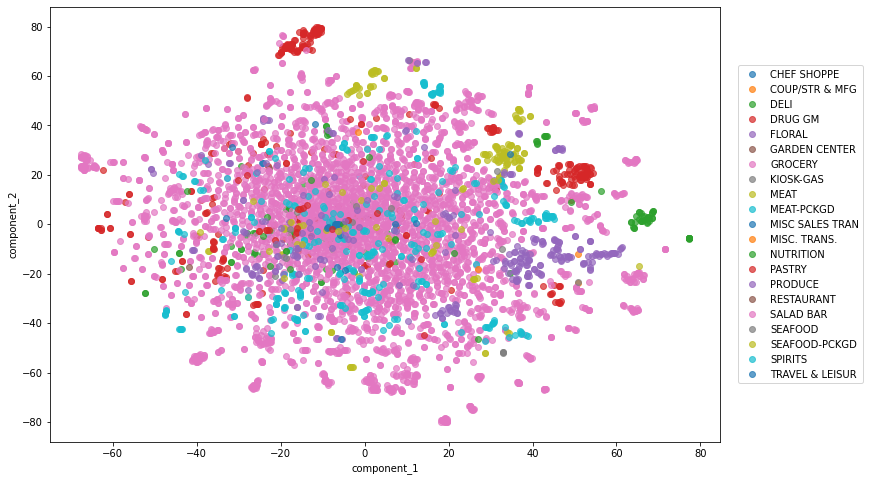

Wall time: 1min 6s


In [39]:
%%time
item_emb_tsne = reduce_dims(model.item_factors, dims=2, method='tsne') # 5001 х 100  ---> 5001 x 2
item_emb_tsne['category'] = category  # Добавляем категорию
item_emb_tsne = item_emb_tsne[item_emb_tsne['category'] != 'UNKNOWN']

display_components_in_2D_space(item_emb_tsne, labels='category')

Нарисуем все, кроме GROCERY

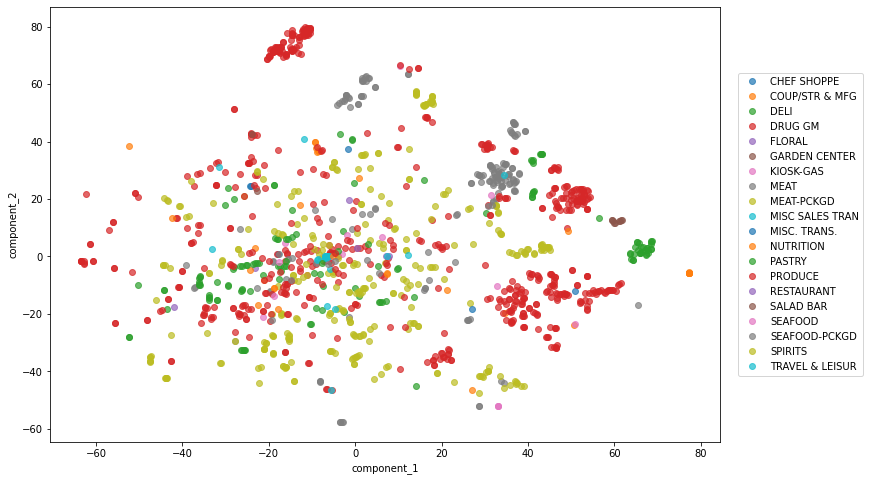

In [40]:
display_components_in_2D_space(item_emb_tsne[item_emb_tsne['category'] != 'GROCERY'], labels='category')

Нарисуем несколько конкретных категорий

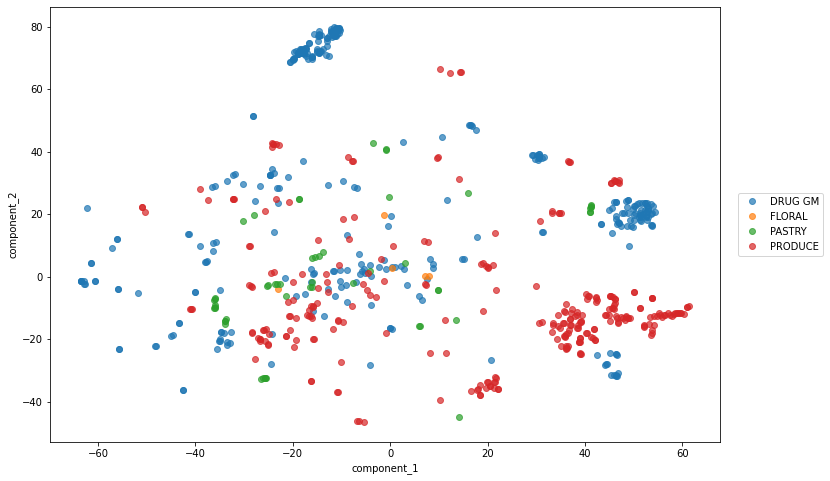

In [41]:
interesting_cats = ['PASTRY', 'PRODUCE', 'DRUG GM', 'FLORAL']

display_components_in_2D_space(item_emb_tsne[item_emb_tsne['category'].isin(interesting_cats)], 
                                             labels='category')

На самом деле, я бы сказал, что **результат средний**:
- Модель выучила похожесть только небольшой части товаров

In [42]:
item_emb_tsne.head(2)

,component_1,component_2,category
0,-6.940107,0.268249,MISC SALES TRAN
1,-21.301443,-21.028330,KIOSK-GAS


recommend_all делает перемножение, но еще и сортирует и выбирает топ-N

In [43]:
item_1 = model.item_factors[1]
item_2 = model.item_factors[2]

In [44]:
item_1.shape

(64,)

*Посмотрите также / Похожие товары*

In [45]:
example_item_row_id = 3606

In [46]:
id_to_itemid[example_item_row_id]

1101010

In [47]:
closest_items = [ id_to_itemid[row_id] for row_id, score in model.similar_items(example_item_row_id, N=5)]

In [48]:
item_features[item_features.item_id.isin(closest_items)]

,item_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
5915,819978,3544,DELI,National,CHEESES,CHEESE: PROCESSED BULK,
18923,933835,3705,DELI,National,DELI MEATS,MEAT: SAUS DRY BULK,
28449,1018740,3516,DELI,National,DELI MEATS,MEAT:HAM BULK,
30927,1040807,3544,DELI,National,CHEESES,CHEESE: PROCESSED BULK,
37665,1101010,3862,DELI,National,DELI MEATS,MEAT: LUNCHMEAT BULK,


*Вашим друзьям нравится / Похожим пользователям нравится / ...*

Пользователь --> похожих пользовтелей --> рекомендовать те товары, которые купили похожие юзеры

In [49]:
model.similar_users(userid_to_id[10], N=5)

[(9, 6.6470428),
 (790, 6.5285997),
 (354, 6.500062),
 (1147, 6.4952316),
 (1681, 6.485871)]

### 2. TF-IDF взвешивание

In [50]:
user_item_matrix = tfidf_weight(user_item_matrix.T).T  # Применяется к item-user матрице ! 

In [51]:
%%time

model = AlternatingLeastSquares(factors=64, 
                                regularization=0.05,
                                iterations=15, 
                                calculate_training_loss=True, 
                                num_threads=10)

model.fit(csr_matrix(user_item_matrix).T.tocsr(),  # На вход item-user matrix
          show_progress=True)


  0%|          | 0/15 [00:00<?, ?it/s]

Wall time: 11.5 s


In [52]:
result['als_tfidf'] = result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))

result.apply(lambda row: precision_at_k(row['als_tfidf'], row['actual']), axis=1).mean()

0.16012054244098242

### 3. BM25 взвешивание

In [53]:
# Заведем фиктивный item_id (если юзер покупал товары из топ-5000, то он "купил" такой товар)
data_train.loc[~data_train['item_id'].isin(top_5000), 'item_id'] = 999999

user_item_matrix = pd.pivot_table(data_train, 
                                  index='user_id', columns='item_id', 
                                  values='quantity', # Можно пробоват ьдругие варианты
                                  aggfunc='count', 
                                  fill_value=0
                                 )

user_item_matrix = user_item_matrix.astype(float) # необходимый тип матрицы для implicit

# переведем в формат saprse matrix
sparse_user_item = csr_matrix(user_item_matrix).tocsr()

user_item_matrix.head(3)

C:\Users\LMAXL\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


item_id,202291,397896,420647,480014,545926,707683,731106,818980,819063,819227,...,15926885,15926886,15926887,15926927,15927033,15927403,15927661,15927850,16809471,17105257
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
user_item_matrix = bm25_weight(user_item_matrix.T).T  # Применяется к item-user матрице ! 

In [55]:
%%time

# model = AlternatingLeastSquares(factors=128, 
#                                 regularization=0.05,
#                                 iterations=15, 
#                                 calculate_training_loss=True, 
#                                 num_threads=4) # K - кол-во билжайших соседей

model = AlternatingLeastSquares(factors=64, 
                                regularization=0.05,
                                iterations=15, 
                                calculate_training_loss=True, 
                                num_threads=10)

model.fit(csr_matrix(user_item_matrix).T.tocsr(),  # На вход item-user matrix
          show_progress=True)

result['als_bm25'] = result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))

  0%|          | 0/15 [00:00<?, ?it/s]

Wall time: 50.1 s


In [56]:
result.apply(lambda row: precision_at_k(row['als_bm25'], row['actual']), axis=1).mean()

0.1746860873932673

In [58]:
result.to_csv('predictions_mf.csv', index=False)  # mf - matrix factorization

## 4. Важно искать оптимальные параметры

- regularization, iterations(+-)
- factors
- Вес (элемент в матрице user-item)

Поэкспериментировать с ALS (grid-search):

факторы

количество итераций

регуляризации

In [64]:
iterations = [10,15,25,50]
factors = [32,64,128]
regularizations = [0.01, 0.05, 0.1, 0.5]

# iterations = [10]
# factors = [32]
# regularizations = [0.01]
means = {}


for iteration_num in iterations:
    for factor_num in factors:
            for regularization_num in regularizations:
                model = AlternatingLeastSquares(factors=factor_num, 
                                        regularization=regularization_num,
                                        iterations=iteration_num, 
                                        calculate_training_loss=True, 
                                        num_threads=10,
                                        use_gpu=False)

        
                model.fit(csr_matrix(user_item_matrix).T.tocsr(),  # На вход item-user matrix
                          show_progress=True)

                result[f'{factor_num}-{iteration_num}-{regularization_num}'] = result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
                
                means[f'{factor_num}-{iteration_num}-{regularization_num}'] = result.apply(lambda row: precision_at_k(row[f'{factor_num}-{iteration_num}-{regularization_num}'], row['actual']), axis=1).mean()
                                

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [65]:
means

{'32-10-0.01': 0.16705173279758662,
 '32-10-0.05': 0.1611250627825191,
 '32-10-0.1': 0.1587142139628308,
 '32-10-0.5': 0.1614264188849801,
 '64-10-0.01': 0.17468608739326727,
 '64-10-0.05': 0.17428427925665263,
 '64-10-0.1': 0.17468608739326727,
 '64-10-0.5': 0.17458563535911367,
 '128-10-0.01': 0.19005524861878184,
 '128-10-0.05': 0.18834756403816896,
 '128-10-0.1': 0.1932697137117,
 '128-10-0.5': 0.19005524861878176,
 '32-15-0.01': 0.15921647413359905,
 '32-15-0.05': 0.15901557006529174,
 '32-15-0.1': 0.1613259668508265,
 '32-15-0.5': 0.1596182822702138,
 '64-15-0.01': 0.1742842792566529,
 '64-15-0.05': 0.17408337518834505,
 '64-15-0.1': 0.17257659467603984,
 '64-15-0.5': 0.16986438975389032,
 '128-15-0.01': 0.18623807132094164,
 '128-15-0.05': 0.1924660974384702,
 '128-15-0.1': 0.1939728779507756,
 '128-15-0.5': 0.18643897538924892,
 '32-25-0.01': 0.1582119537920622,
 '32-25-0.05': 0.15770969362129367,
 '32-25-0.1': 0.15610246107483475,
 '32-25-0.5': 0.15720743345052532,
 '64-25-0.0

In [70]:
best_params = max(means, key=means.get)
print(best_params, means[best_params])

128-15-0.1 0.1939728779507756


Из сетки параметров видно, что наибольшее значение на результат оказал factors , с увеличением признака существенно растет метрика.

iterations существенно не влияет, лучшее значение из сетки = 15, далее скор падает.

regularization также лучшее значение 0.1, далее падение скора.

В связи со всем этим - пробуем пересчитать грид с лучшими параметрами и с, возможно, еще лучшими:


In [71]:
iterations = [15, 20]
factors = [128, 256]
regularizations = [0.07, 0.1, 0.2]

means = {}


for iteration_num in iterations:
    for factor_num in factors:
            for regularization_num in regularizations:
                model = AlternatingLeastSquares(factors=factor_num, 
                                        regularization=regularization_num,
                                        iterations=iteration_num, 
                                        calculate_training_loss=True, 
                                        num_threads=10,
                                        use_gpu=False)

        
                model.fit(csr_matrix(user_item_matrix).T.tocsr(),  # На вход item-user matrix
                          show_progress=True)

                legend = f'{factor_num}-{iteration_num}-{regularization_num}'
                print(legend)
                
                result[legend] = result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
                means[legend] = result.apply(lambda row: precision_at_k(row[legend], row['actual']), axis=1).mean()

  0%|          | 0/15 [00:00<?, ?it/s]

128-15-0.07


  0%|          | 0/15 [00:00<?, ?it/s]

128-15-0.1


  0%|          | 0/15 [00:00<?, ?it/s]

128-15-0.2


  0%|          | 0/15 [00:00<?, ?it/s]

256-15-0.07


  0%|          | 0/15 [00:00<?, ?it/s]

256-15-0.1


  0%|          | 0/15 [00:00<?, ?it/s]

256-15-0.2


  0%|          | 0/20 [00:00<?, ?it/s]

128-20-0.07


  0%|          | 0/20 [00:00<?, ?it/s]

128-20-0.1


  0%|          | 0/20 [00:00<?, ?it/s]

128-20-0.2


  0%|          | 0/20 [00:00<?, ?it/s]

256-20-0.07


  0%|          | 0/20 [00:00<?, ?it/s]

256-20-0.1


  0%|          | 0/20 [00:00<?, ?it/s]

256-20-0.2


In [72]:
best_params = max(means, key=means.get)
print(best_params, means[best_params])

128-20-0.07 0.1937719738824683


In [73]:
means

{'128-15-0.07': 0.18995479658462802,
 '128-15-0.1': 0.18674033149170977,
 '128-15-0.2': 0.18905072827724495,
 '256-15-0.07': 0.1933701657458536,
 '256-15-0.1': 0.18955298844801313,
 '256-15-0.2': 0.18915118031139874,
 '128-20-0.07': 0.1937719738824683,
 '128-20-0.1': 0.19226519337016293,
 '128-20-0.2': 0.19296835760923864,
 '256-20-0.07': 0.18975389251632077,
 '256-20-0.1': 0.19055750878954997,
 '256-20-0.2': 0.190256152687089}

В этот раз на тех же параметрах '128-15-0.1' метрика существенно хуже 0.18674033149170977,
лучший результат: 128-20-0.07 0.1937719738824683